# Data Preparation Week
The goal of this assignment is to get familiar with data preparation tasks and be able to download
and use data preparation tools.



In [2]:
#Importing packages
import pandas as pd
import numpy as np
import plotnine

## Task1:
Download and run as many of the following tools as possible and run them on the provided datasets:
1. Nadeef https://github.com/daqcri/NADEEF You need to install JDK, JRE and Postgresql. In
postgres, you need to create a user “tester” with the password the same as the user name
and create a database “nadeef”. You can also change these options in the file nadeef.config
in the main directory if you don’t want to create the user with this password. Download
apache ant https://ant.apache.org/bindownload.cgi and open Windows PowerShell or
terminal (in Linux/MAC) and change the working directory to NADEEF where you extracted
the code from github. In the directory of NADEEF run the command ant and it will compile
and install nadeef. If your installation is successful, then you can run the command
(./nadeef.bat dashboard) in Windows or (./nadeef.bat dashboard) in Linux/MAC. Explore the
tool and try to find the violation for the functional dependency first name → gender in the
fdExample.csv file that we posted in Week 3.
2. FAHES https://github.com/qahtanaa/pFAHES
3. dBoost https://github.com/cpitclaudel/dBoost

## Task2:
For this task, two tables from data.gov.uk will be used to master the data preparation task. In fact,
searching for the data is part of the data preparation; however, this task is done. The repository in
data.gov.uk provides a set of datasets gathered in the United Kingdom from multiple organizations.
The tables that we are going to use have been gathered from the traffic department.
1. The data is divided over two tables, which is inconvenient for doing analysis. Using the
merge function, merge them into one data frame using the Accident_Index field.
2. The "Accident_Severity" variable needs to be recoded. You need to replace the code by:
1=Minor, 2=Medium, 3=Severe.
3. For a set of variables, missing values has been replaced by -1. Detect these values and report
the names of the columns in each table that contain such values.
4. For all variables, check if there are any clearly extreme values, or values that do not belong in
that column. If you find any, remove these records from the dataset.
5. Compute a variable called is_minor , that checks whether a casualty was a minor or an adult.
Being adult is defined as having an age of 18 or above. The column should only contain the
values ‘Yes’ and ‘No’.
6. The 'Location_Easting_OSGR' variable has about 27 of missing values - solve this with
imputation of the average of the 'Location_Easting_OSGR' of all records. That means,
calculate the average of all the available values in 'Location_Easting_OSGR' and fill the
missing cells in the column with the average value.
7. Use FAHES to detect the disguised missing value in both tables and confirm if they are actual
disguised values or not.


## Question 1:
importing and merge data frames

In [3]:
#1 import and merge data frames
accidents = pd.read_csv('Accidents_2015.csv')
casualties = pd.read_csv('Casualties_2015.csv')

C:\Users\hansf\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.


In [4]:
accidents.head()


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [5]:
casualties.head()


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1
2,201597UA71810,2,2,2,2,75,10,2,0,0,0,4,0,11,1,-1
3,201597UA71810,2,3,2,1,78,11,2,0,0,0,4,0,11,1,-1
4,201597UA71810,2,4,2,1,67,10,2,0,0,0,4,0,11,1,-1


In [167]:
# Accident_index seems to be the key column to merge
df = pd.merge(accidents, casualties)
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,7,3,5,1,0,0,2,0,-1,-1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,5,3,9,9,0,0,2,0,1,3
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,6,3,1,3,0,0,2,0,1,6
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,2,3,5,1,0,0,2,0,1,2
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,8,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164515,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,1,3,0,0,2,0,0,9,1,-1
164516,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,5,3,0,0,0,0,0,9,1,2
164517,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,4,3,0,0,0,0,0,9,2,5
164518,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,6,3,0,0,0,0,0,9,3,-1


## Question 2: 
The "Accident_Severity" variable needs to be recoded. You need to replace the code by: 1=Minor, 2=Medium, 3=Severe.

In [12]:
# look if there exists only, 1, 2 and 3
df.groupby('Accident_Severity').count()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
1,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550,...,2550,2550,2550,2550,2550,2550,2550,2550,2550,2550
2,24357,24354,24354,24354,24354,24357,24357,24357,24357,24357,...,24357,24357,24357,24357,24357,24357,24357,24357,24357,24357
3,137613,137579,137579,137579,137579,137613,137613,137613,137613,137613,...,137613,137613,137613,137613,137613,137613,137613,137613,137613,137613


In [18]:
# Use replace to change number to string

values = {1:"Minor", 2:"Medium", 3:"Severe"}

df["Accident_Severity"].replace(values, inplace=True)
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,Severe,1,1,12/01/2015,...,7,3,5,1,0,0,2,0,-1,-1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,Severe,1,1,12/01/2015,...,5,3,9,9,0,0,2,0,1,3
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,Severe,1,1,12/01/2015,...,6,3,1,3,0,0,2,0,1,6
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,Severe,1,1,13/01/2015,...,2,3,5,1,0,0,2,0,1,2
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,Medium,2,1,09/01/2015,...,8,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164515,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,1,3,0,0,2,0,0,9,1,-1
164516,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,5,3,0,0,0,0,0,9,1,2
164517,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,4,3,0,0,0,0,0,9,2,5
164518,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,6,3,0,0,0,0,0,9,3,-1


## Question 3:
For a set of variables, missing values has been replaced by -1. Detect these values and report the names of the columns in each table that contain such values.

In [37]:
# Filter values in every colum using Booelan + sum()
(df == -1).sum()
    

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [44]:
# Filter values in every colum using for loop + list with names

list_col = {}

for i in df.columns:
    val = (df[i] == -1).sum() #test if the column has -1 and sum the values
    if val > 0:
        list_col[i] = val #put col name as dict key + value of numbers 1

df2 = pd.DataFrame.from_dict(list_col, orient="index") #just for visualisation
df2

,0
Junction_Detail,1
Junction_Control,67102
2nd_Road_Class,67597
2nd_Road_Number,710
Pedestrian_Crossing-Human_Control,167
Pedestrian_Crossing-Physical_Facilities,155
Road_Surface_Conditions,283
Special_Conditions_at_Site,125
Carriageway_Hazards,112
Did_Police_Officer_Attend_Scene_of_Accident,12


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,7,3,5,1,0,0,2,0,-1,-1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,5,3,9,9,0,0,2,0,1,3
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,6,3,1,3,0,0,2,0,1,6
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,2,3,5,1,0,0,2,0,1,2
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,8,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164515,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,1,3,0,0,2,0,0,9,1,-1
164516,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,5,3,0,0,0,0,0,9,1,2
164517,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,4,3,0,0,0,0,0,9,2,5
164518,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,3,13,7,31/12/2015,...,6,3,0,0,0,0,0,9,3,-1


## Question 4: 

For all variables, check if there are any clearly extreme values, or values that do not belong in that column. If you find any, remove these records from the dataset.

In [45]:
#look for statistics summary in each col
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,164483.000000,1.644830e+05,164483.000000,164483.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,...,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000,164520.000000
mean,433867.513080,3.133885e+05,-1.516787,52.708916,28.070399,1.944341,1.803866,4.102261,324.773426,4.039539,...,6.233230,2.864539,0.680337,0.483759,0.260218,0.082501,0.067736,7.263506,1.031881,3.623377
std,93851.653096,1.558802e+05,1.383437,1.403324,25.846930,0.930826,1.668908,1.940075,261.828031,1.433839,...,2.387067,0.369066,1.950589,1.657545,0.578072,0.542815,0.363323,7.562240,0.967798,3.464770
min,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,370270.000000,1.852400e+05,-2.445609,51.550900,6.000000,1.000000,1.000000,2.000000,95.000000,3.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,434750.000000,2.874140e+05,-1.479285,52.479976,21.000000,2.000000,1.000000,4.000000,293.000000,3.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,3.000000
75%,519270.000000,4.053100e+05,-0.265631,53.542369,43.000000,2.000000,2.000000,6.000000,472.000000,6.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,6.000000
max,655282.000000,1.197917e+06,1.758443,60.661117,98.000000,37.000000,38.000000,7.000000,941.000000,6.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [192]:
#remove coments to see what is happening in each line1

df_outliers = df.copy()
range_row = len(df_outliers)

for i,k in enumerate(df): #i = column index, k = column name
    #print(i,k)
    if (df_outliers[k].dtypes == "object"):
        pass
    else: 
        #print(i,k, df[k].dtypes)
        mean_col = df_outliers[k].mean()
        std_col = df_outliers[k].std()
        for j in range(0,range_row):
            #print("Linha => ", df.iloc[j,i])
            if (df_outliers.iloc[j,i] > (mean_col + 3*std_col) ):
                df_outliers.iloc[j,i] = "outlier"
                                
df_outliers

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,525130.0,180050,-0.198465,51.5055,1,3,1,1,12/01/2015,...,7,3,5,1,0,0,outlier,0,-1,-1
1,201501BS70002,526530.0,178560,-0.178838,51.4918,1,3,1,1,12/01/2015,...,5,3,outlier,outlier,0,0,outlier,0,1,3
2,201501BS70004,524610.0,181080,-0.205590,51.5149,1,3,1,1,12/01/2015,...,6,3,1,3,0,0,outlier,0,1,6
3,201501BS70005,524420.0,181080,-0.208327,51.515,1,3,1,1,13/01/2015,...,2,3,5,1,0,0,outlier,0,1,2
4,201501BS70008,524630.0,179040,-0.206022,51.4966,1,2,2,1,09/01/2015,...,8,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164515,2015984141415,314050.0,579638,-3.348646,55.1037,98,3,outlier,outlier,31/12/2015,...,1,3,0,0,outlier,0,0,9,1,-1
164516,2015984141415,314050.0,579638,-3.348646,55.1037,98,3,outlier,outlier,31/12/2015,...,5,3,0,0,0,0,0,9,1,2
164517,2015984141415,314050.0,579638,-3.348646,55.1037,98,3,outlier,outlier,31/12/2015,...,4,3,0,0,0,0,0,9,2,5
164518,2015984141415,314050.0,579638,-3.348646,55.1037,98,3,outlier,outlier,31/12/2015,...,6,3,0,0,0,0,0,9,3,-1


In [254]:
#Using zscore from scipy

#first remove non-numeric columns
list_col = []
for i,j in enumerate(df):
    if df[j].dtypes != "object":
        list_col.append(j)

#remove every nan
df_z = df.dropna()

df_z = df_z[list_col]

from scipy.stats import zscore
z_scores = zscore(df_z)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_z[filtered_entries]

df_final = pd.merge(df_z, df) #join with "object columns"

In [259]:
df_final

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2,12,...,0,2,0,-1,-1,201501BS70001,12/01/2015,18:45,E09000020,E01002825
1,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2,12,...,0,2,0,1,3,201501BS70002,12/01/2015,07:50,E09000020,E01002820
2,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2,12,...,0,2,0,1,6,201501BS70004,12/01/2015,18:08,E09000020,E01002833
3,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,3,12,...,0,2,0,1,2,201501BS70005,13/01/2015,07:40,E09000020,E01002874
4,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,6,12,...,0,0,1,1,3,201501BS70008,09/01/2015,07:30,E09000020,E01002814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153058,316410.0,235410.0,-3.219306,52.010801,63,2,2,1,2,753,...,0,0,16,-1,-1,201563DP43615,21/12/2015,15:00,W06000023,W01000445
153059,286880.0,230100.0,-3.647634,51.957842,63,3,1,1,4,753,...,0,0,9,3,-1,201563DP43715,04/11/2015,18:05,W06000023,W01000474
153060,305640.0,261370.0,-3.383387,52.242398,63,3,2,2,5,753,...,0,0,9,3,-1,201563DP43815,10/12/2015,08:45,W06000023,W01000454
153061,305640.0,261370.0,-3.383387,52.242398,63,3,2,2,5,753,...,0,0,9,2,-1,201563DP43815,10/12/2015,08:45,W06000023,W01000454


## Question 5.
Compute a variable called is_minor , that checks whether a casualty was a minor or an adult.
Being adult is defined as having an age of 18 or above. The column should only contain the
values ‘Yes’ and ‘No’.
6. The 'Location_Easting_OSGR' variable has about 27 of missing values - solve this with
imputation of the average of the 'Location_Easting_OSGR' of all records. That means,
calculate the average of all the available values in 'Location_Easting_OSGR' and fill the
missing cells in the column with the average value.

In [139]:
#Need to use apply() => new column (condition if true else false)
df["is_minor"] = df["Age_of_Casualty"].apply(lambda x: 'Yes' if x >= 18 else 'No')
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile,is_minor
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,Severe,1,1,12/01/2015,...,3,5,1,0,0,2,0,-1,-1,Yes
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,Severe,1,1,12/01/2015,...,3,9,9,0,0,2,0,1,3,Yes
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,Severe,1,1,12/01/2015,...,3,1,3,0,0,2,0,1,6,Yes
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,Severe,1,1,13/01/2015,...,3,5,1,0,0,2,0,1,2,No
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,Medium,2,1,09/01/2015,...,2,0,0,0,0,0,1,1,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164515,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,3,0,0,2,0,0,9,1,-1,No
164516,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,3,0,0,0,0,0,9,1,2,Yes
164517,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,3,0,0,0,0,0,9,2,5,Yes
164518,2015984141415,314050.0,579638.0,-3.348646,55.103676,98,Severe,13,7,31/12/2015,...,3,0,0,0,0,0,9,3,-1,Yes


## Question 6. 
The 'Location_Easting_OSGR' variable has about 27 of missing values - solve this with
imputation of the average of the 'Location_Easting_OSGR' of all records. That means,
calculate the average of all the available values in 'Location_Easting_OSGR' and fill the
missing cells in the column with the average value.

In [145]:
#in fact there is 37 nan values
df["Location_Easting_OSGR"].isna().sum()

37

In [146]:
#showing the indexes
df["Location_Easting_OSGR"][df["Location_Easting_OSGR"].isna()]

32885    NaN
32886    NaN
32887    NaN
75274    NaN
75275    NaN
75276    NaN
75277    NaN
82562    NaN
82796    NaN
83029    NaN
83030    NaN
83031    NaN
83429    NaN
83571    NaN
83908    NaN
84110    NaN
84111    NaN
84281    NaN
84282    NaN
84325    NaN
90398    NaN
117930   NaN
117931   NaN
118013   NaN
118055   NaN
145892   NaN
146121   NaN
147665   NaN
149478   NaN
150291   NaN
150416   NaN
150417   NaN
150914   NaN
152964   NaN
154388   NaN
156827   NaN
156894   NaN
Name: Location_Easting_OSGR, dtype: float64

In [148]:
#filling na with avg
df["Location_Easting_OSGR"].fillna(df["Location_Easting_OSGR"].mean(), inplace=True)

In [149]:
#Check again
df["Location_Easting_OSGR"].isna().sum()

0

## Task3:
For this task, use the dataset pid.csv. This dataset were publicly available but it has been removed
from the repository so use it for this assignment and don’t redistribute it. The name of the table
and the names of the columns has been changed to anonymize the data. 
1. Remove the disguised values from the table -- We need to remove the values that equal 0
from columns C,D and F as these are missing values but they have been disguised by the
value 0. Remove the value but keep the record (i.e.) change the value to null
2. Remove the Label column and remove one of the columns if their correlation is greater than
0.6. That is, if there are two columns with correlation value > 0.6 then remove one of them
and keep the other. The input for this step is the original dataframe not the one that has been
produced at step 1.
3. Use a Python or R-library to find the principal components and project the data on those
components. Plot the projected data on the first and the second (principal components) PCs as
a scatter plot. If you are working with R, use the (prcomp) R-function. For Python, check
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Using GG Plot in Python

In [7]:

# pip install plotnine
import pandas as pd

from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

C:\Users\hansf\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


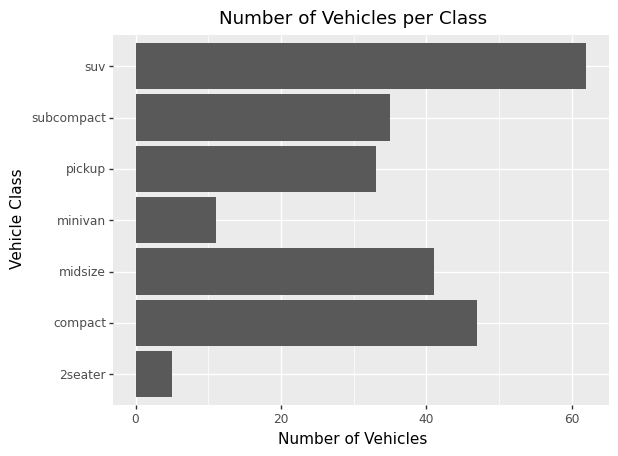

<ggplot: (121727316673)>

In [8]:
(ggplot(mpg)
 + aes(x='class')
 + geom_bar(size=20)
 + coord_flip()        # flipping the x- and y-axes
 + labs(title='Number of Vehicles per Class', x='Vehicle Class', y='Number of Vehicles') # customizing labels
)